# Part D preprocessing


## Step 1: Import libraries


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Step 2: Load the dataset

In [13]:
df = pd.read_csv("churn_clean.csv")

In [15]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


## Step 3: Select relevant continuous features

In [20]:
features = df[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

## Step 4: Handle missing values 

In [23]:
features = features.dropna()

## Step 5: Scale the data

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Step 6: Save cleaned dataset

In [29]:
# Convert scaled features back to a DataFrame for saving or visualization
scaled_df = pd.DataFrame(scaled_features, columns=['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])

# Save to a new CSV (for submission)
scaled_df.to_csv("cleaned_churn_data.csv", index=False)

# Part E Optimal; number of clusters

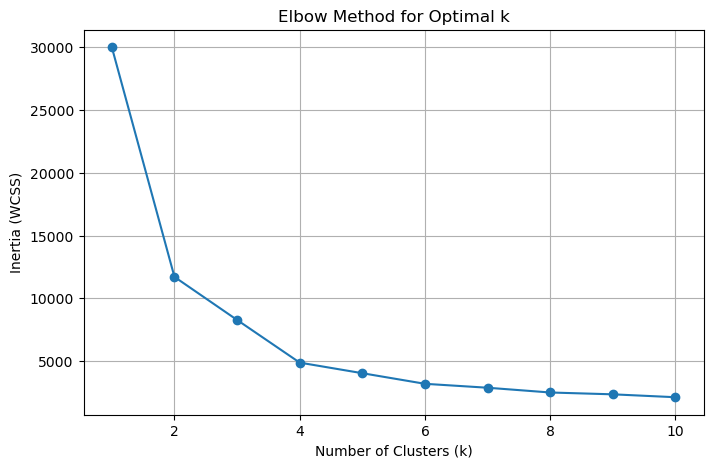

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use your scaled data
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.savefig("elbow_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# PART F VISUAL THE CLUSTERS

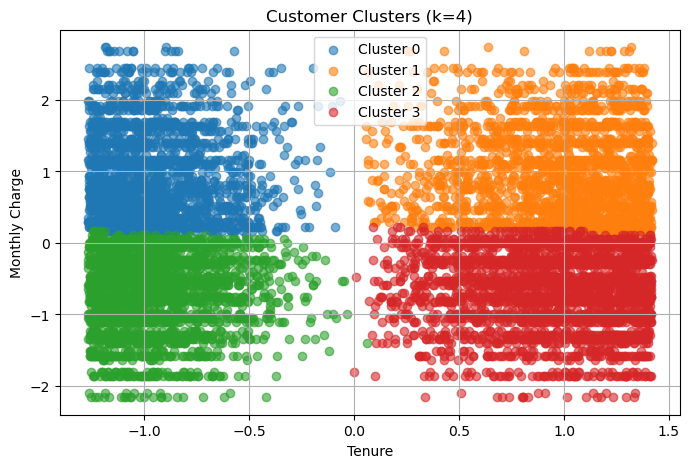

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
clustered_df = pd.DataFrame(scaled_features, columns=['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
clustered_df['Cluster'] = clusters

plt.figure(figsize=(8, 5))
for cluster in range(4):
    cluster_data = clustered_df[clustered_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Tenure'], cluster_data['MonthlyCharge'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("Customer Clusters (k=4)")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charge")
plt.legend()
plt.grid(True)
plt.savefig("customer_clusters.png", dpi=300, bbox_inches='tight')
plt.show()